# Bode Simulation Example

In this example, we run a **BODE** simulation of an ideal buck (step-down) model.

This is the same code saved in the **40_Bode.py**, with more interactive descriptions.

## 1. Run a Simulation

After running below block of code, we have the simulation result in a Pandas DataFrame **df

This takes a time!

In [1]:
from PyQSPICE import clsQSPICE as pqs

import re
import math
import cmath
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

fname = "Buck_COT_Bode"

run = pqs(fname)

run.InitPlot()

if not run.ts['cir']:
    run.qsch2cir()
if not run.ts['qraw']:
    run.cir2qraw()
    
run.setNline(499)

olg = "OpenLoopGain"
df = (run.LoadQRAW([olg])).rename(columns = {olg: "olg"})

df = run.GainPhase(df, "olg", "gain", "phase")

run.comp2real(df, ["Step", "gain", "phase", run.sim['Xlbl']])

print(df)

              Freq                     olg  Step       gain      phase
0      1000.000000  162.468269+199.186525j   0.0  48.200123  50.797288
1      1009.271515  160.581792+196.029633j   0.0  48.076306  50.676660
2      1018.628990  158.699183+193.038627j   0.0  47.955279  50.575999
3      1028.073224  156.870390+190.178812j   0.0  47.837343  50.482232
4      1037.605020  155.027761+187.323886j   0.0  47.717627  50.389113
..             ...                     ...   ...        ...        ...
495   96375.786638    0.111569+  0.218821j   0.0 -12.194663  62.984639
496   97269.336154    0.110997+  0.205887j   0.0 -12.619338  61.670275
497   98171.170228    0.111188+  0.200061j   0.0 -12.807766  60.936064
498   99081.365669    0.112412+  0.199675j   0.0 -12.797882  60.621541
499  100000.000000    0.114338+  0.201577j   0.0 -12.699712  60.437297

[500 rows x 5 columns]


Note that the gain calculation of "df = df.apply()" makes everything "complex". So we re-convert known "non-complex" data to "real".

## 2. Plotting

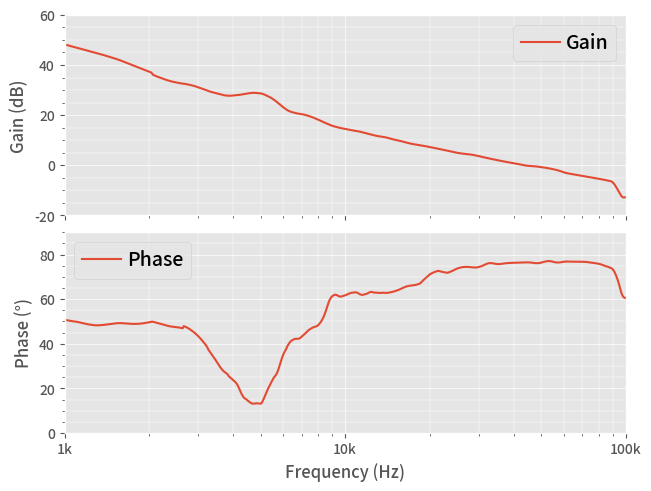

In [2]:
# Prepare a blank plotting area
plt.close("all")
fig2, (axT, axB) = plt.subplots(2,1,sharex=True,constrained_layout=True)

# Plot Bode (AC) curves
df.plot(ax=axB, x="Freq",  y="phase", label="Phase")
df.plot(ax=axT, x="Freq",  y="gain", label="Gain")

run.PrepFreqGainPlot(axT, "Frequency (Hz)", r"Gain (dB)", [1e3,100e3], [-20,60])
run.PrepFreqGainPlot(axB, "Frequency (Hz)", r"Phase (°)", [1e3,100e3], [0,90])

# Save the Plot in PNG file
plt.savefig(run.path['base'] + "_plt.png", format='png', bbox_inches='tight')
plt.show()

plt.close('all')
